<a href="https://colab.research.google.com/github/srik6724/MAT-422/blob/main/Homework_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class ProbabilityAxioms:
    def __init__(self, sample_space):
        self.sample_space = sample_space
        self.probabilities = {}

    def set_probability(self, event, prob):
        if prob < 0:
            raise ValueError("Probability cannot be negative")
        self.probabilities[event] = prob

    def check_normalization(self):
        total_prob = sum(self.probabilities.get(event, 0) for event in self.sample_space)
        return total_prob == 1

    def additivity(self, event_a, event_b):
        if set(event_a).intersection(set(event_b)):
            print("Events are not mutually exclusive")
        prob_a = self.probabilities.get(event_a, 0)
        prob_b = self.probabilities.get(event_b, 0)
        return prob_a + prob_b


sample_space = {"Heads", "Tails"}

prob_system = ProbabilityAxioms(sample_space)

prob_system.set_probability("Heads", 0.5)
prob_system.set_probability("Tails", 0.5)

print("Is normalized:", prob_system.check_normalization())  # True

print("Additivity of Heads and Tails:", prob_system.additivity("Heads", "Tails"))  # 1.0

Is normalized: True
Events are not mutually exclusive
Additivity of Heads and Tails: 1.0


In [ ]:
class ConditionalProbability:
    def __init__(self, prob_a, prob_b, prob_a_and_b):
        # Initialize with probabilities of A, B, and A and B
        self.prob_a = prob_a
        self.prob_b = prob_b
        self.prob_a_and_b = prob_a_and_b

    def calculate_conditional(self):
        # Check that P(B) is not zero to avoid division by zero
        if self.prob_b == 0:
            print("The probability of event B cannot be zero.")

        return self.prob_a_and_b / self.prob_b


prob_a = 0.3
prob_b = 0.5
prob_a_and_b = 0.2

cond_prob_system = ConditionalProbability(prob_a, prob_b, prob_a_and_b)

print(f"Conditional Probability P(A|B): {cond_prob_system.calculate_conditional():.2f}")

Conditional Probability P(A|B): 0.40


In [ ]:
class DiscreteRandomVariable:
    def __init__(self, outcomes, probabilities):

        if len(outcomes) != len(probabilities):
            print("Outcomes and probabilities must have the same length.")

        if abs(sum(probabilities) - 1.0) > 1e-6:
            print("The sum of probabilities must be 1.")

        self.outcomes = outcomes
        self.probabilities = probabilities
        self.pmf = dict(zip(outcomes, probabilities))  # Create a PMF dictionary

    def get_pmf(self):
        return self.pmf

    def expected_value(self):
        return sum(outcome * prob for outcome, prob in self.pmf.items())


outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6

die_roll = DiscreteRandomVariable(outcomes, probabilities)

print("Probability Mass Function (PMF):")
for outcome, prob in die_roll.get_pmf().items():
    print(f"P(X={outcome}) = {prob:.2f}")

expected_value = die_roll.expected_value()
print(f"\nExpected Value E(X): {expected_value:.2f}")

Probability Mass Function (PMF):
P(X=1) = 0.17
P(X=2) = 0.17
P(X=3) = 0.17
P(X=4) = 0.17
P(X=5) = 0.17
P(X=6) = 0.17

Expected Value E(X): 3.50


PDF at x = 1: 0.2420
Probability of -1 <= X <= 1: 0.6827


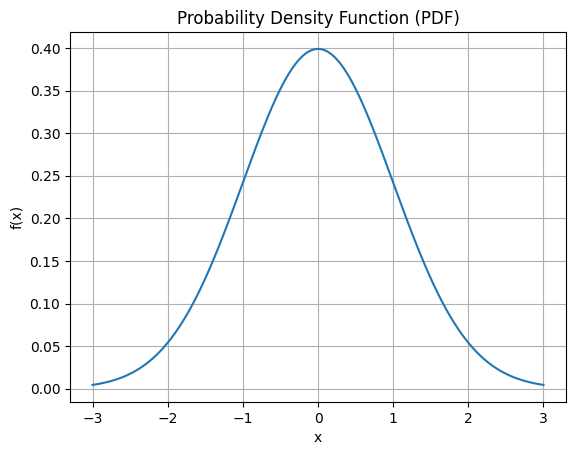

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

class ContinuousRandomVariable:
    def __init__(self, mean, std_dev):
        self.mean = mean
        self.std_dev = std_dev
        self.distribution = stats.norm(loc=mean, scale=std_dev)  # Normal distribution

    def pdf(self, x):
        return self.distribution.pdf(x)

    def probability_over_interval(self, a, b):
        return self.distribution.cdf(b) - self.distribution.cdf(a)  # P(a <= X <= b)

    def plot_pdf(self, start=-10, end=10):
        x_values = np.linspace(start, end, 1000)
        y_values = self.pdf(x_values)

        plt.plot(x_values, y_values, label="PDF")
        plt.title("Probability Density Function (PDF)")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.show()

mean = 0
std_dev = 1
normal_rv = ContinuousRandomVariable(mean, std_dev)

x = 1
pdf_at_x = normal_rv.pdf(x)
print(f"PDF at x = {x}: {pdf_at_x:.4f}")

interval_probability = normal_rv.probability_over_interval(-1, 1)
print(f"Probability of -1 <= X <= 1: {interval_probability:.4f}")

normal_rv.plot_pdf(start=-3, end=3)